# Lab 3

## Imports

In [1]:
import numpy as np
import pandas as pd
from os import path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow import data as tf_data
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## TASK1. Fully connected neural networks

### Dataset preparation

In [2]:
data = pd.read_csv("./parkinsons_disease_data.csv", sep=',')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [3]:
data = data.drop('PatientID', axis=1)
data = data.drop('DoctorInCharge', axis=1)

In [4]:
feature_names = list(data.columns)
feature_names.remove('Diagnosis')

In [5]:
categorial_features = ['Gender', 'Ethnicity', 'EducationLevel','Smoking','FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes','Depression','Stroke',
            'Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation','Diagnosis']
print(categorial_features)
print(f"Number of categorial_features: {len(categorial_features)}")

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']
Number of categorial_features: 18


In [6]:
numerical_features = list(set(feature_names) - set(categorial_features))
print(numerical_features)
print(f"Number of categorial_features: {len(numerical_features)}")

['CholesterolTriglycerides', 'AlcoholConsumption', 'SystolicBP', 'DiastolicBP', 'PhysicalActivity', 'CholesterolTotal', 'BMI', 'CholesterolHDL', 'UPDRS', 'MoCA', 'Age', 'DietQuality', 'CholesterolLDL', 'FunctionalAssessment', 'SleepQuality']
Number of categorial_features: 15


In [7]:
data.shape

(2105, 33)

In [8]:
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [9]:
X = data.drop(['Diagnosis'], axis = 1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [10]:
X.shape

(2105, 32)

In [11]:
y.shape

(2105,)

In [12]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=64,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5755 - loss: 0.7458 - val_accuracy: 0.6142 - val_loss: 0.6531
Epoch 2/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5797 - loss: 0.6842 - val_accuracy: 0.6172 - val_loss: 0.6541
Epoch 3/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6007 - loss: 0.6639 - val_accuracy: 0.6113 - val_loss: 0.6466
Epoch 4/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6413 - val_accuracy: 0.6202 - val_loss: 0.6371
Epoch 5/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 0.6270 - val_accuracy: 0.6172 - val_loss: 0.6279
Epoch 6/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.6162 - val_accuracy: 0.6172 - val_loss: 0.6132
Epoch 7/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.6261 - val_accuracy: 0.6409 - val_loss: 0.6021
Epoch 8/64
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6041 - val_accuracy: 0.6380 - val_loss:

In [16]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,805 (18.77 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,204 (12.52 KB)

None


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

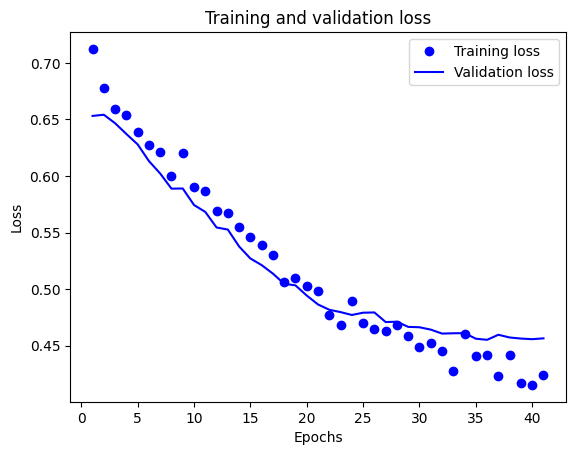

In [18]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.42676272988319397
Test accuracy: 0.8218527436256409


## TASK2. Convolutional Neural Networks

Dataset: [https://www.kaggle.com/datasets/at081028/starwars-images](https://www.kaggle.com/datasets/at081028/starwars-images)

### Import dataset

In [20]:
image_size = (64, 64)
batch_size = 32

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1212 files belonging to 5 classes.
Using 970 files for training.
Using 242 files for validation.


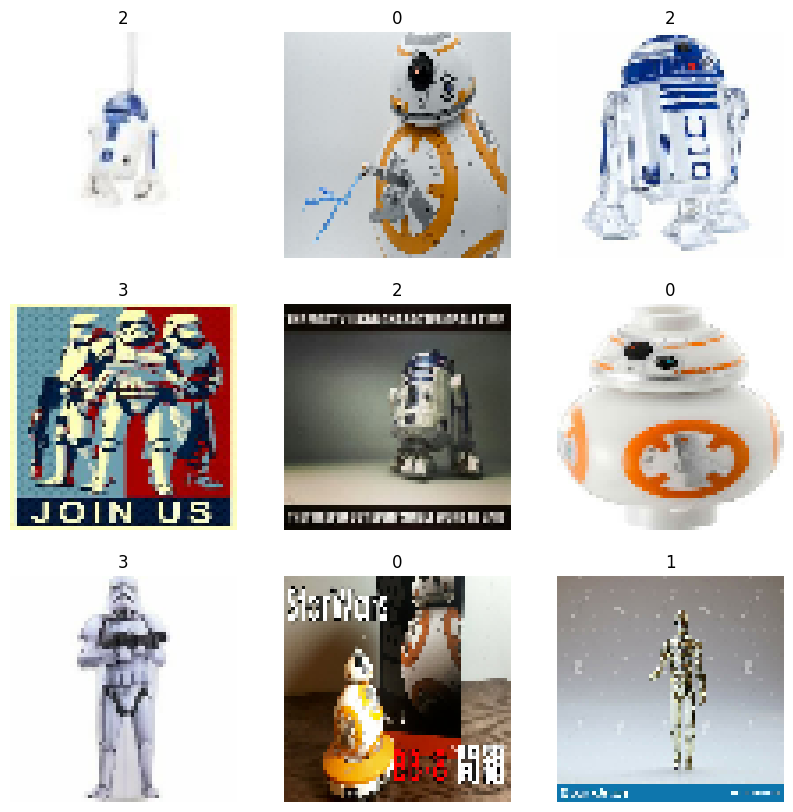

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Using image data augmentation

In [22]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


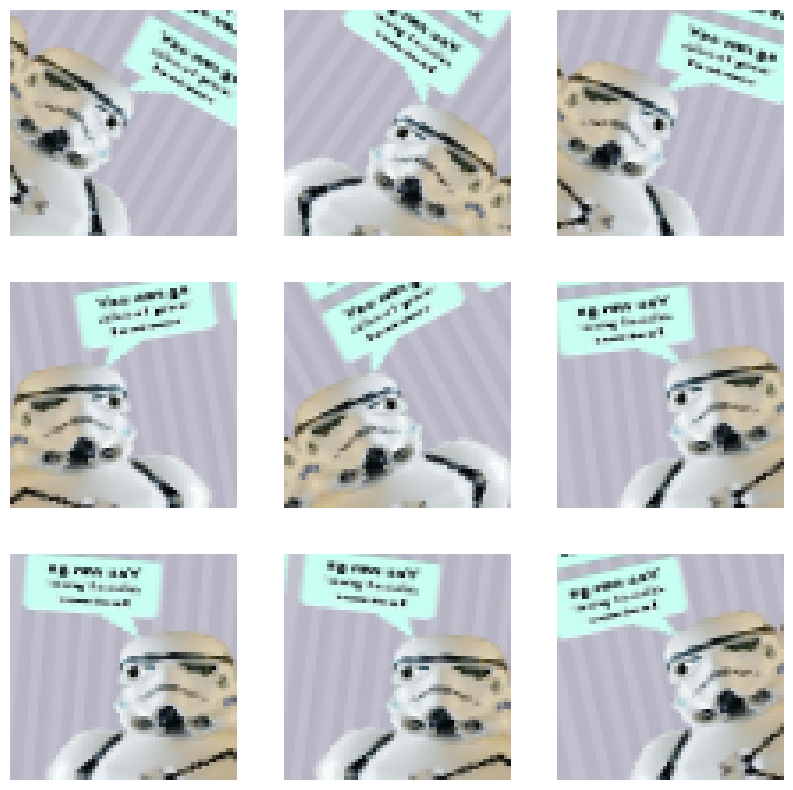

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [24]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)

### Prefetch data

In [25]:
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

### Build a model

In [26]:
def make_model(input_shape, _num_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.25)(x)

    # Use softmax activation for multi-class classification
    outputs = layers.Dense(_num_classes, activation="softmax")(x)
    
    return keras.Model(inputs, outputs)

In [27]:
model = make_model(input_shape=image_size + (3,), _num_classes=5)

### Train the model

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 64, 64, 3)         │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 32, 32, 128)       │           3,584 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 32, 32, 128)       │             512 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 32, 32, 128)       │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 32, 32, 128)       │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ separable_conv2d              │ (None, 32, 32, 256)       │          34,176 │ activation_1[0][0]         │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32, 32, 256)       │           1,024 │ separable_conv2d[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 32, 32, 256)       │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ separable_conv2d_1            │ (None, 32, 32, 256)       │          68,096 │ activation_2[0][0]         │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 32, 32, 256)       │           1,024 │ separable_conv2d_1[0][0]   │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 16, 16, 256)       │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 16, 16, 256)       │          33,024 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 16, 16, 256)       │               0 │ max_pooling2d[0][0],       │
│                               │                           │                 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,735,165 (10.43 MB)

 Trainable params: 2,726,877 (10.40 MB)

 Non-trainable params: 8,288 (32.38 KB)

In [29]:
callbacks = [EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]

In [30]:
epochs = 100

In [31]:
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.4540 - loss: 1.4197 - val_accuracy: 0.2149 - val_loss: 1.6089
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.7611 - loss: 0.6888 - val_accuracy: 0.2149 - val_loss: 1.6097
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7719 - loss: 0.6054 - val_accuracy: 0.2149 - val_loss: 1.6098
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8087 - loss: 0.5873 - val_accuracy: 0.2066 - val_loss: 1.6145
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.8405 - loss: 0.4672 - val_accuracy: 0.2107 - val_loss: 1.6239
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8580 - loss: 0.4405 - val_accuracy: 0.2149 - val_loss: 1.6212
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.8728 - loss: 0.3870 - val_accuracy: 0.2149 - val_loss: 1.6296
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9070 - loss: 0.3637 - val_accu

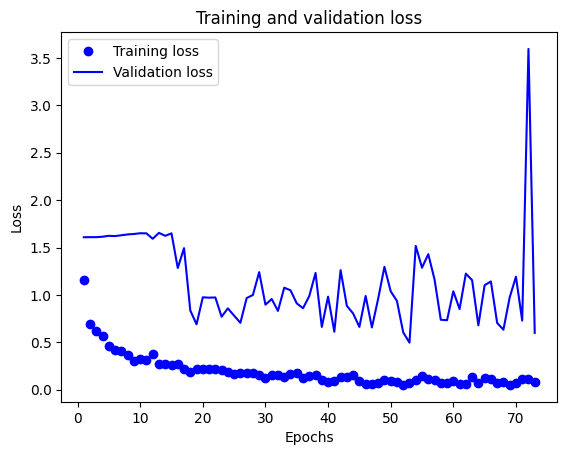

In [32]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
test_ds = keras.utils.image_dataset_from_directory(
    "validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 315 files belonging to 5 classes.


In [34]:
score = model.evaluate(test_ds, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.48878294229507446
Test accuracy: 0.9079365134239197


> Continue in the file lab3_2_2.ipynb